# Initialization

The size of a uniform full grown tree depends on the depth and the dimensions and is given by the formula:
$size = \sum_{i=0}^{level}{2^{i*n}}$


In [12]:
def nodes_at_level(level, dims):
    if level < 0:
        return 0
    return 2**(level*dims)+nodes_at_level(level-1, dims)

Some examples:    

|dims\level| 1 | 2 | 3 | 4 | 5 |   
| --- | :---: | :---: | :---: | :---: | :---: |
|1|1| 3| 7| 15| 31|
|2|1| 5| 21| 85| 341|
|3|1| 9| 73| 585| 4681|
|4|1| 17| 273| 4369| 69905|
|5|1| 33| 1057| 33825| 1082401|


In [2]:
import sys
sys.path.insert(0, '../src')

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import bin_exploration

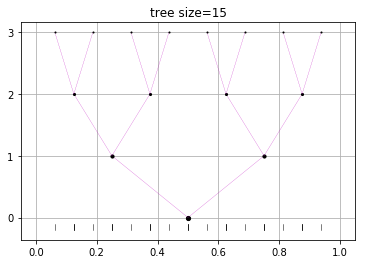

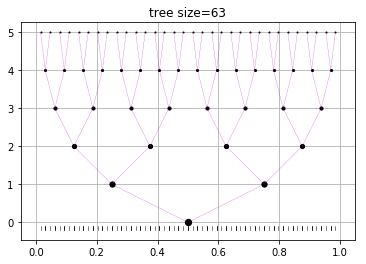

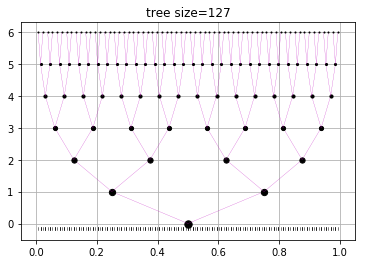

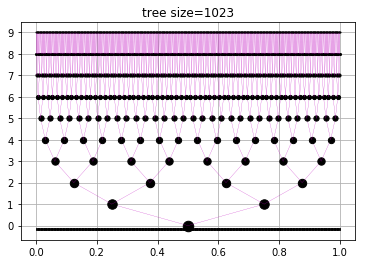

In [3]:
# for 1d tree

# size = 15
tree = bin_exploration.Exploration_tree(1, 15)
tree.plot()

# size = 63
tree = bin_exploration.Exploration_tree(1, 63)
tree.plot()

# size = 127
tree = bin_exploration.Exploration_tree(1, 127)
tree.plot()

# size = 1023
tree = bin_exploration.Exploration_tree(1, 1023)
tree.plot()

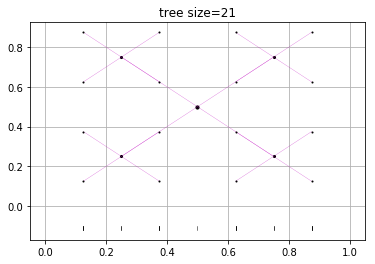

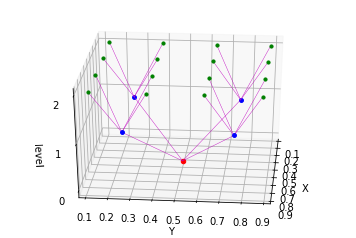

In [19]:
# for 2d tree

from matplotlib.ticker import MaxNLocator

# size = 21
tree = bin_exploration.Exploration_tree(2, 21)
tree.plot() # view from top
# a 3d view of this points
nodes = tree.get_nodes()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'b', 'g', 'c']

for node in nodes:
# add the depth of the nodes as a 3d axis
    point = np.append(node.get_location(), node.get_level())
    if node.is_root():
        parent_point = point
    else:
        parent = node._parent
        parent_point = np.append(parent.get_location(), parent.get_level())
    
    ax.plot([point[0], parent_point[0]],
            [point[1], parent_point[1]],
            [point[2], parent_point[2]], c='m', linewidth=.4)
    ax.scatter(point[0], point[1], point[2], c=colors[int(point[2])], s=20-5*point[2])
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('level')
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

ax.view_init(30, 5)
    
plt.show()


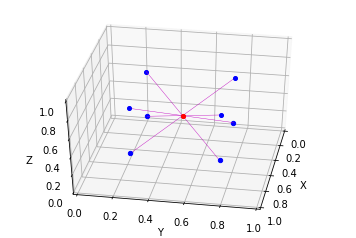

In [15]:
# for 3d tree

# size = 9
tree = bin_exploration.Exploration_tree(3, 9)
#tree.plot() doesn't plot the 3d dimension
nodes = tree.get_nodes()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'b']

for node in nodes:
    # add the depth of the nodes as a 3d axis
    point = node.get_location()
    level = int(node.get_level())
    if node.is_root():
        parent_point = point
    else:
        parent = node._parent
        parent_point = parent.get_location()
    
    ax.plot([point[0], parent_point[0]],
            [point[1], parent_point[1]],
            [point[2], parent_point[2]], c='m', linewidth=.4)
    ax.scatter(point[0], point[1], point[2], c=colors[level], s=20-5*point[2])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(40, 10)
    
plt.show()
